# Optimial expression to find

$$Y = 0.4X_2^2 + 2X_4 + 2$$

# Import packages

In [1]:
from atgfe.GeneticFeatureEngineer import GeneticFeatureEngineer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from yellowbrick.regressor import ResidualsPlot, PredictionError
from lightgbm import LGBMRegressor

In [2]:
df = pd.read_csv('./data/generated_3.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,2.985875,2.328380,2.477121,2.956649,2.997823,2.863917,2.559907,1.772705
1,2.012837,2.482874,2.686636,2.806180,2.662758,2.669317,2.902547,1.688366
2,2.324282,2.653213,2.627366,2.981819,2.617000,2.895423,2.898725,1.901985
3,1.579784,2.434569,2.794488,2.737193,2.957128,2.808886,2.431364,1.357517
4,1.778151,2.695482,2.514548,2.987219,2.641474,2.955688,2.872156,1.693612


In [3]:
target = 'Y'
columns = df.drop(target, axis=1).columns.tolist()

In [4]:
X = df.drop(target, axis=1).copy()
Y = df.loc[:, target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

In [5]:
def display_residual_plot(model):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()                 

In [6]:
def prediction_error_plot(model):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()     

In [7]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [8]:
def score_model(model, X, y):
    evaluation_metric_scorer = make_scorer(rmse, greater_is_better=True)
    scores = cross_val_score(estimator=model, X=X, y=y, cv=10, scoring=evaluation_metric_scorer, n_jobs=-1)
    scores_mean = scores.mean()
    score_std = scores.std()
    print('Mean of metric: {}, std: {}'.format(scores_mean, score_std))

In [9]:
def create_new_model():
    return make_pipeline(StandardScaler(), LinearRegression())

# Using LightGBM

In [10]:
lgbm_model = LGBMRegressor(random_state=7)

In [11]:
score_model(lgbm_model, X, Y)

Mean of metric: 0.10208948453458995, std: 0.04861021818019637


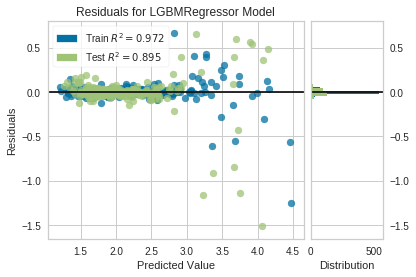

In [12]:
display_residual_plot(lgbm_model)

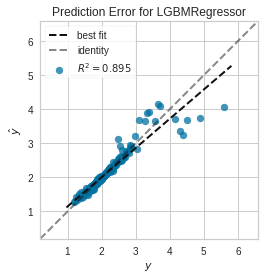

In [13]:
prediction_error_plot(lgbm_model)

# Using Linear Regression

In [14]:
model = create_new_model()

In [15]:
score_model(model, X, Y)

Mean of metric: 0.14059245610479723, std: 0.03965331155573807


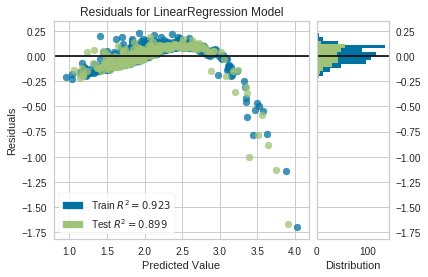

In [16]:
display_residual_plot(model)

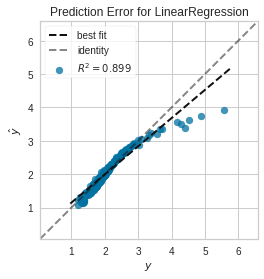

In [17]:
prediction_error_plot(model)

# Using ATgfe

In [18]:
gfe = GeneticFeatureEngineer(model, x_train=X_train, y_train=y_train, numerical_features=columns,
                             number_of_candidate_features=1,
                             number_of_interacting_features=4,
                             evaluation_metric=rmse, minimize_metric=True, verbose=True, cv=10,
                             fit_wo_original_columns=False, enable_feature_transformation_operations=False, enable_weights=True)

2019-11-15 22:50:16,933:INFO: New Engineer created with the following parameters: 
2019-11-15 22:50:16,935:INFO: 
Model type: <class 'sklearn.pipeline.Pipeline'>
Numerical Features: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
Number of candidate features: 1
Number of interacting features: 4
Evaluation Metric: rmse
Minimize metric is True 


In [19]:
gfe.fit(population_size=2000, early_stopping_patience=3)

2019-11-15 22:50:17,020:INFO: Start of evolution 
2019-11-15 22:50:41,627:INFO:   Evaluated 2000 individuals 
2019-11-15 22:50:41,629:INFO: -- Generation 1 -- 
2019-11-15 22:50:56,635:INFO:   Evaluated 1200 individuals 
2019-11-15 22:50:56,641:INFO:   Min 0.034913746615105365 
2019-11-15 22:50:56,642:INFO:   Max 1000000000000.0 
2019-11-15 22:50:56,643:INFO:   Avg 51700000000.09186 
2019-11-15 22:50:56,644:INFO:   Std 214818784094.85162 
2019-11-15 22:50:58,793:INFO: Generation: 1, validation scores: [0.03257055 0.02423836 0.03875517 0.03940688 0.02237302 0.04619992
 0.02542971 0.0248634  0.03463594 0.0252763 ], mean_score: 0.0313749247086174 
2019-11-15 22:50:58,795:INFO: Generation: 1, best solution features: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', '0.203478260869565*X1/X5**2'] 
2019-11-15 22:50:58,796:INFO: -- Generation 2 -- 
2019-11-15 22:51:12,260:INFO:   Evaluated 1144 individuals 
2019-11-15 22:51:12,267:INFO:   Min 0.004995523108937673 
2019-11-15 22:51:12,268:INFO:   Max 1

# Use ATgfe

# Apply GFE

In [20]:
X = gfe.transform(X)

In [21]:
X.head(20)

,X1,X2,X3,X4,X5,X6,X7,1.78571428571429*(0.06*X1 + 0.06*X2)/X5
0,2.985875,2.328380,2.477121,2.956649,2.997823,2.863917,2.559907,0.189933
1,2.012837,2.482874,2.686636,2.806180,2.662758,2.669317,2.902547,0.180896
2,2.324282,2.653213,2.627366,2.981819,2.617000,2.895423,2.898725,0.203784
3,1.579784,2.434569,2.794488,2.737193,2.957128,2.808886,2.431364,0.145448
4,1.778151,2.695482,2.514548,2.987219,2.641474,2.955688,2.872156,0.181458
5,2.666518,2.993436,2.842609,2.509203,2.751279,2.930440,2.828015,0.220415
6,2.827369,2.187521,2.783189,2.949390,2.985875,2.691965,2.645422,0.179950
7,2.537819,2.206826,2.492760,2.604226,2.969882,2.348305,2.904174,0.171170
8,2.767156,1.568202,2.629410,2.238046,2.387390,2.488551,2.152288,0.194565
9,2.758155,2.546543,1.954243,2.474216,2.863917,1.397940,2.960946,0.198456


In [22]:
model = create_new_model()

In [23]:
score_model(model, X, Y)

Mean of metric: 4.451459254717589e-15, std: 3.6653119629626353e-16


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

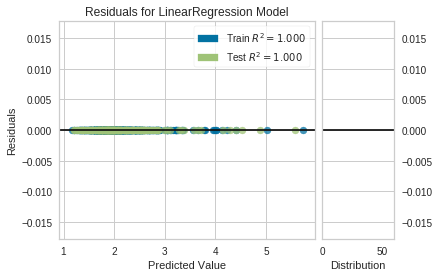

In [25]:
display_residual_plot(model)

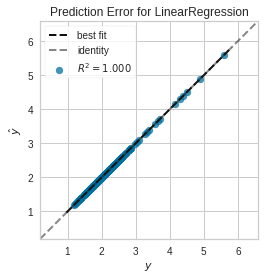

In [26]:
prediction_error_plot(model)